# Load Data

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('titanic.csv')

# Visualize Data

In [3]:
data.head()
#sibsp = # of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,id
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,2
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,3
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,4
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,5


In [4]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,id
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,655.000000
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,378.020061
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,328.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,655.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,982.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1309.000000


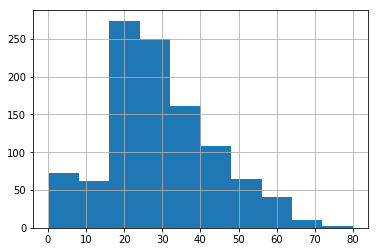

In [5]:
data['age'].hist()

In [6]:
data.corr()

,pclass,survived,age,sibsp,parch,fare,id
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,0.897822
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,-0.293717
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,-0.343888
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,0.065594
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.003584
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.481215
id,0.897822,-0.293717,-0.343888,0.065594,0.003584,-0.481215,1.000000


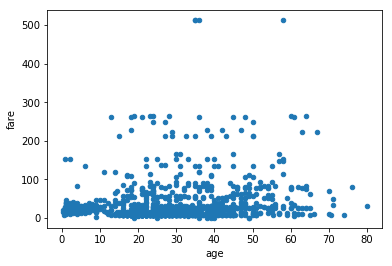

In [7]:
data.plot(kind='scatter', x = 'age', y = 'fare')

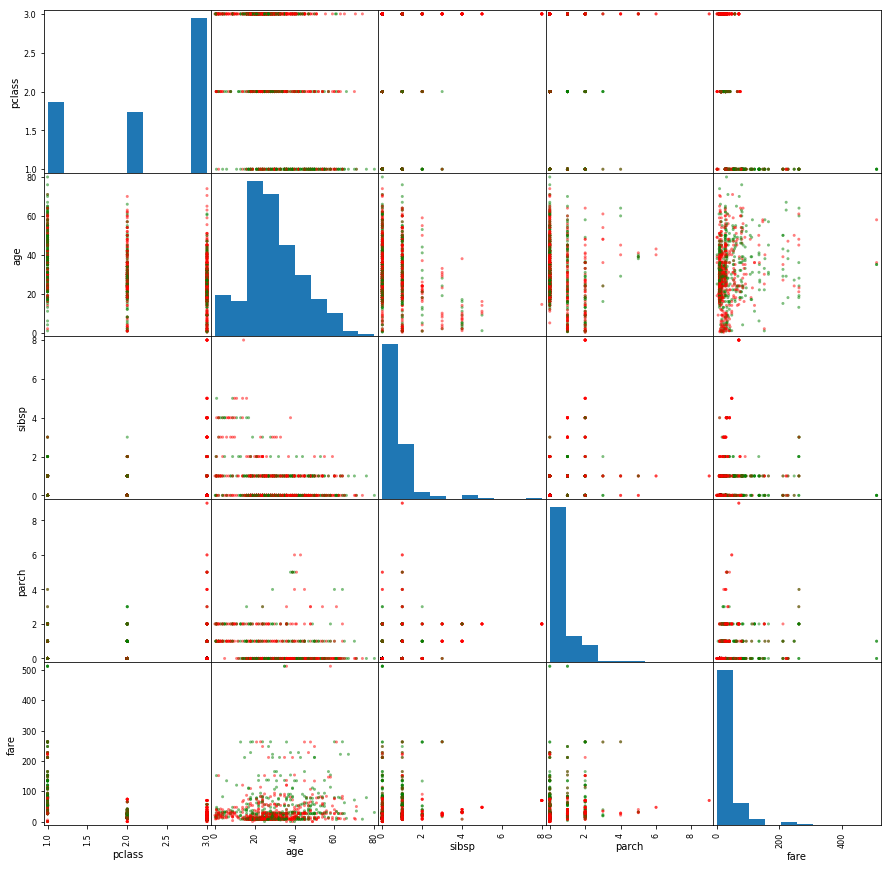

In [13]:
# plot scatter matrix
from pandas.plotting import scatter_matrix

color_wheel = {1: "r", 
               2: "g"}
colors = data["survived"].map(lambda x: color_wheel.get(x + 1))
_ = scatter_matrix(data.drop(['id', 'survived'], axis = 1), figsize = (15, 15), color = colors)

# Feature Engineering

In [8]:
data['sex'] = data['sex'].apply(lambda sex: 1 if sex == 'female' else 0)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,id
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,B5,S,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,2
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,3
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,4
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,5


In [9]:
data['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [10]:
embarkation_point = pd.get_dummies(data['embarked'])
data = pd.concat([data, embarkation_point], axis = 1)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,id,C,Q,S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,B5,S,1,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,2,0,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,3,0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,4,0,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,5,0,0,1


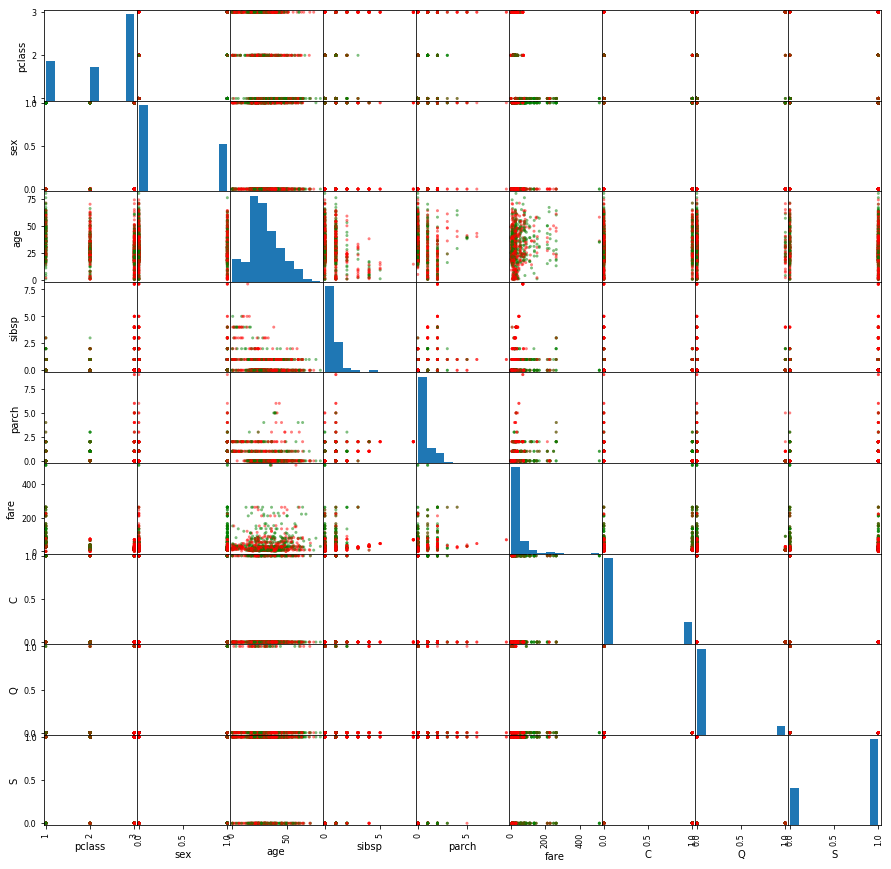

In [16]:
_ = scatter_matrix(data.drop(['id', 'survived'], axis = 1), figsize = (15, 15), color = colors)

# Modeling

In [29]:
def predict_survival(row):
    if row['C'] == 1 and row['fare'] > 50:
        return 1
    if row['sex'] == 1:
        return 1
    else:
        return 0

In [30]:
predictions = data.apply(lambda row: predict_survival(row), axis = 1)

# Evaluation

In [31]:
accuracy = sum(predictions == data['survived'])/len(predictions)
print('Model Accuracy: {0:.9f}'.format(accuracy, 'laallala'))

Model Accuracy: 0.772345302


In [27]:
data_missed_pred = data[data['survived'] != predictions]
data_missed_pred.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,id,C,Q,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.55,C22 C26,S,2,0,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.55,C22 C26,S,3,0,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.55,C22 C26,S,5,0,0,1
5,1.0,1.0,"Anderson, Mr. Harry",0,48.0000,0.0,0.0,19952,26.55,E12,S,6,0,0,1
14,1.0,1.0,"Barkworth, Mr. Algernon Henry Wilson",0,80.0000,0.0,0.0,27042,30.00,A23,S,15,0,0,1
